<a href="https://colab.research.google.com/github/Minecka2023/MB_Minetska_3-14/blob/main/LB3_MB_Minetska_3_14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Завантаження даних з файлу
data_path = 'social_ads.csv'
data = pd.read_csv(data_path)

# Перегляд перших кількох рядків та інформації про датасет
data_head = data.head()
data_info = data.info()
data.describe(), data_head, data_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


(              Age  EstimatedSalary   Purchased
 count  400.000000       400.000000  400.000000
 mean    37.655000     69742.500000    0.357500
 std     10.482877     34096.960282    0.479864
 min     18.000000     15000.000000    0.000000
 25%     29.750000     43000.000000    0.000000
 50%     37.000000     70000.000000    0.000000
 75%     46.000000     88000.000000    1.000000
 max     60.000000    150000.000000    1.000000,
    Age  EstimatedSalary  Purchased
 0   19            19000          0
 1   35            20000          0
 2   26            43000          0
 3   27            57000          0
 4   19            76000          0,
 None)

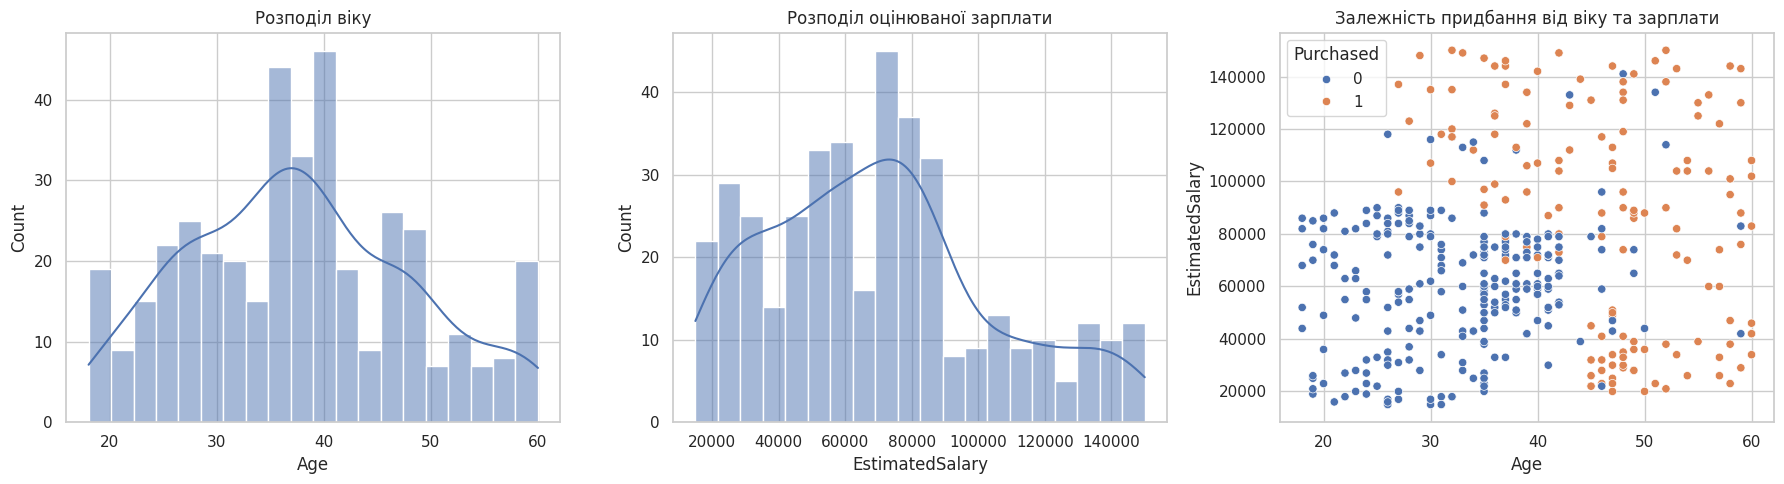

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Налаштування візуального стилю
sns.set(style="whitegrid")

# Створення фігури та графіків
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

# Розподіл віку
sns.histplot(data['Age'], bins=20, kde=True, ax=ax[0])
ax[0].set_title('Розподіл віку')

# Розподіл зарплати
sns.histplot(data['EstimatedSalary'], bins=20, kde=True, ax=ax[1])
ax[1].set_title('Розподіл оцінюваної зарплати')

# Залежність придбання від віку та зарплати
sns.scatterplot(x='Age', y='EstimatedSalary', hue='Purchased', data=data, ax=ax[2])
ax[2].set_title('Залежність придбання від віку та зарплати')

plt.tight_layout()
plt.show()


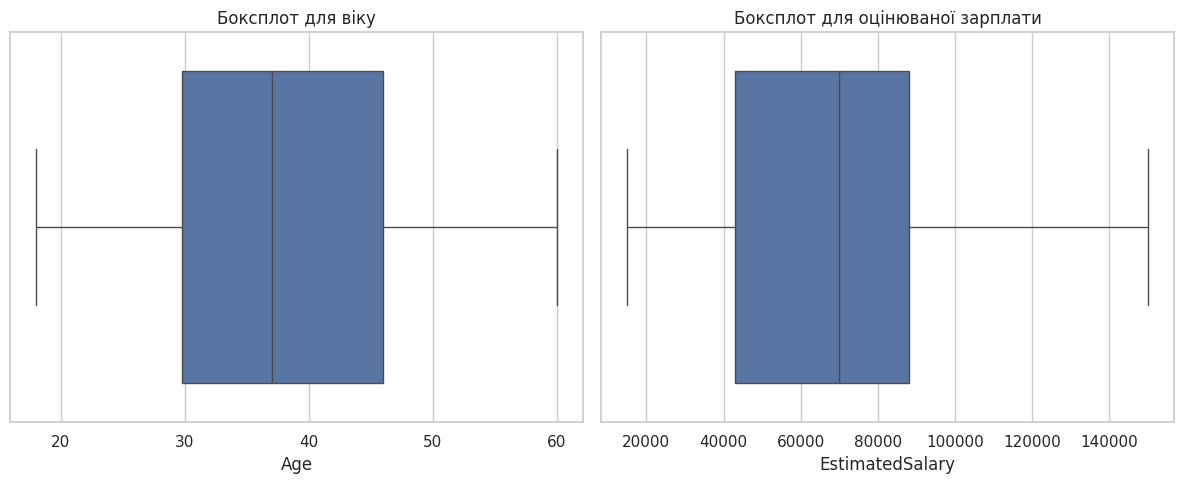

In [3]:
# Боксплоти для виявлення викидів
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Боксплот для віку
sns.boxplot(x=data['Age'], ax=ax[0])
ax[0].set_title('Боксплот для віку')

# Боксплот для оцінюваної зарплати
sns.boxplot(x=data['EstimatedSalary'], ax=ax[1])
ax[1].set_title('Боксплот для оцінюваної зарплати')

plt.tight_layout()
plt.show()


In [4]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = data[['Age', 'EstimatedSalary']]
y = data['Purchased']

# Split the data into training and test sets (70% training, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Output the sizes of the training and test sets to confirm the split
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((280, 2), (120, 2), (280,), (120,))

In [5]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Linear regression with 'Age'
linear_reg = LinearRegression()

# Reshape the 'Age' feature arrays for fitting the model
X_train_age = X_train['Age'].values.reshape(-1, 1)
X_test_age = X_test['Age'].values.reshape(-1, 1)

# Fit the model
linear_reg.fit(X_train_age, y_train)

# Predict on training and test data
y_train_pred_lin = linear_reg.predict(X_train_age)
y_test_pred_lin = linear_reg.predict(X_test_age)

# Calculate the mean squared error on the training and test sets
mse_train_lin = np.mean((y_train - y_train_pred_lin) ** 2)
mse_test_lin = np.mean((y_test - y_test_pred_lin) ** 2)

mse_train_lin, mse_test_lin

(0.14869152706519642, 0.12318337802491484)

In [6]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error

# Create polynomial features for 'EstimatedSalary'
poly = PolynomialFeatures(degree=2)

# Polynomial regression model
poly_reg = make_pipeline(poly, LinearRegression())
poly_reg.fit(X_train[['EstimatedSalary']], y_train)
y_train_pred_poly = poly_reg.predict(X_train[['EstimatedSalary']])
y_test_pred_poly = poly_reg.predict(X_test[['EstimatedSalary']])

# MSE for polynomial regression
mse_train_poly = mean_squared_error(y_train, y_train_pred_poly)
mse_test_poly = mean_squared_error(y_test, y_test_pred_poly)

# Ridge and Lasso regularization
ridge_reg = make_pipeline(poly, Ridge(alpha=1))
lasso_reg = make_pipeline(poly, Lasso(alpha=0.01, max_iter=10000))

ridge_reg.fit(X_train[['EstimatedSalary']], y_train)
lasso_reg.fit(X_train[['EstimatedSalary']], y_train)

# Predictions with Ridge and Lasso
y_train_pred_ridge = ridge_reg.predict(X_train[['EstimatedSalary']])
y_test_pred_ridge = ridge_reg.predict(X_test[['EstimatedSalary']])
y_train_pred_lasso = lasso_reg.predict(X_train[['EstimatedSalary']])
y_test_pred_lasso = lasso_reg.predict(X_test[['EstimatedSalary']])

# MSE for Ridge and Lasso
mse_train_ridge = mean_squared_error(y_train, y_train_pred_ridge)
mse_test_ridge = mean_squared_error(y_test, y_test_pred_ridge)
mse_train_lasso = mean_squared_error(y_train, y_train_pred_lasso)
mse_test_lasso = mean_squared_error(y_test, y_test_pred_lasso)

(mse_train_poly, mse_test_poly), (mse_train_ridge, mse_test_ridge), (mse_train_lasso, mse_test_lasso)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.18329e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


((0.17143507013461484, 0.18363555256120692),
 (0.17143507013461484, 0.18363555256164252),
 (0.17143507013610493, 0.1836356598814492))

In [7]:
# Multiple linear regression with Ridge and Lasso regularization
multi_ridge_reg = Ridge(alpha=1)
multi_lasso_reg = Lasso(alpha=0.01, max_iter=10000)

# Fit the models
multi_ridge_reg.fit(X_train, y_train)
multi_lasso_reg.fit(X_train, y_train)

# Predictions
y_train_pred_multi_ridge = multi_ridge_reg.predict(X_train)
y_test_pred_multi_ridge = multi_ridge_reg.predict(X_test)
y_train_pred_multi_lasso = multi_lasso_reg.predict(X_train)
y_test_pred_multi_lasso = multi_lasso_reg.predict(X_test)

# MSE for multi-linear regression with Ridge and Lasso
mse_train_multi_ridge = mean_squared_error(y_train, y_train_pred_multi_ridge)
mse_test_multi_ridge = mean_squared_error(y_test, y_test_pred_multi_ridge)
mse_train_multi_lasso = mean_squared_error(y_train, y_train_pred_multi_lasso)
mse_test_multi_lasso = mean_squared_error(y_test, y_test_pred_multi_lasso)

(mse_train_multi_ridge, mse_test_multi_ridge), (mse_train_multi_lasso, mse_test_multi_lasso)


((0.12926973391618665, 0.11400576173715117),
 (0.12927072168963386, 0.1141114274445456))